# This notebook will take a qp,qc screen generated from StabilityScreen_CS3390.jl and generate corresponding heatmaps

In [2]:
using SharedArrays
using Distributed
using Random
using JLD
using StatsBase
using Statistics
import PyPlot; const plt = PyPlot;

### Change the line below to load in the correct jld save


In [3]:
d1 = load("../JLD_Saves/nGen_200_nCellType_20_nMediator_15_ri0_0.2_posIntRatio_0.9_at_1_bt_0.1_qp_0.85_qc_0.1_multistability_seed_1588049768_2b259526d35843e69fa2a3679ea06947.jld")

Dict{String,Any} with 2 entries:
  "CMPs"   => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0716644 0.0714722 … …
  "params" => Dict{String,Any}("nInitialCell"=>10000.0,"qp"=>0.85,"bt"=>0.1,"de…

In [4]:
CMPs = d1["CMPs"]
nSamples = d1["params"]["nSample"]

function BrayCurtisComposition(a::T, b::T) where {T<:Array{<:AbstractFloat,1}}
    return 1 - sum(map(min, a, b))
end

BrayCurtisComposition (generic function with 1 method)

In [5]:
bcs = zeros(nSamples, nSamples)

for j = 1:nSamples, i = 1:nSamples
    a = CMPs[:, i]
    b = CMPs[:, j]
    bcs[i,j] = BrayCurtisComposition(a, b)
end

In [6]:
maximum(bcs)

0.03189287297391297

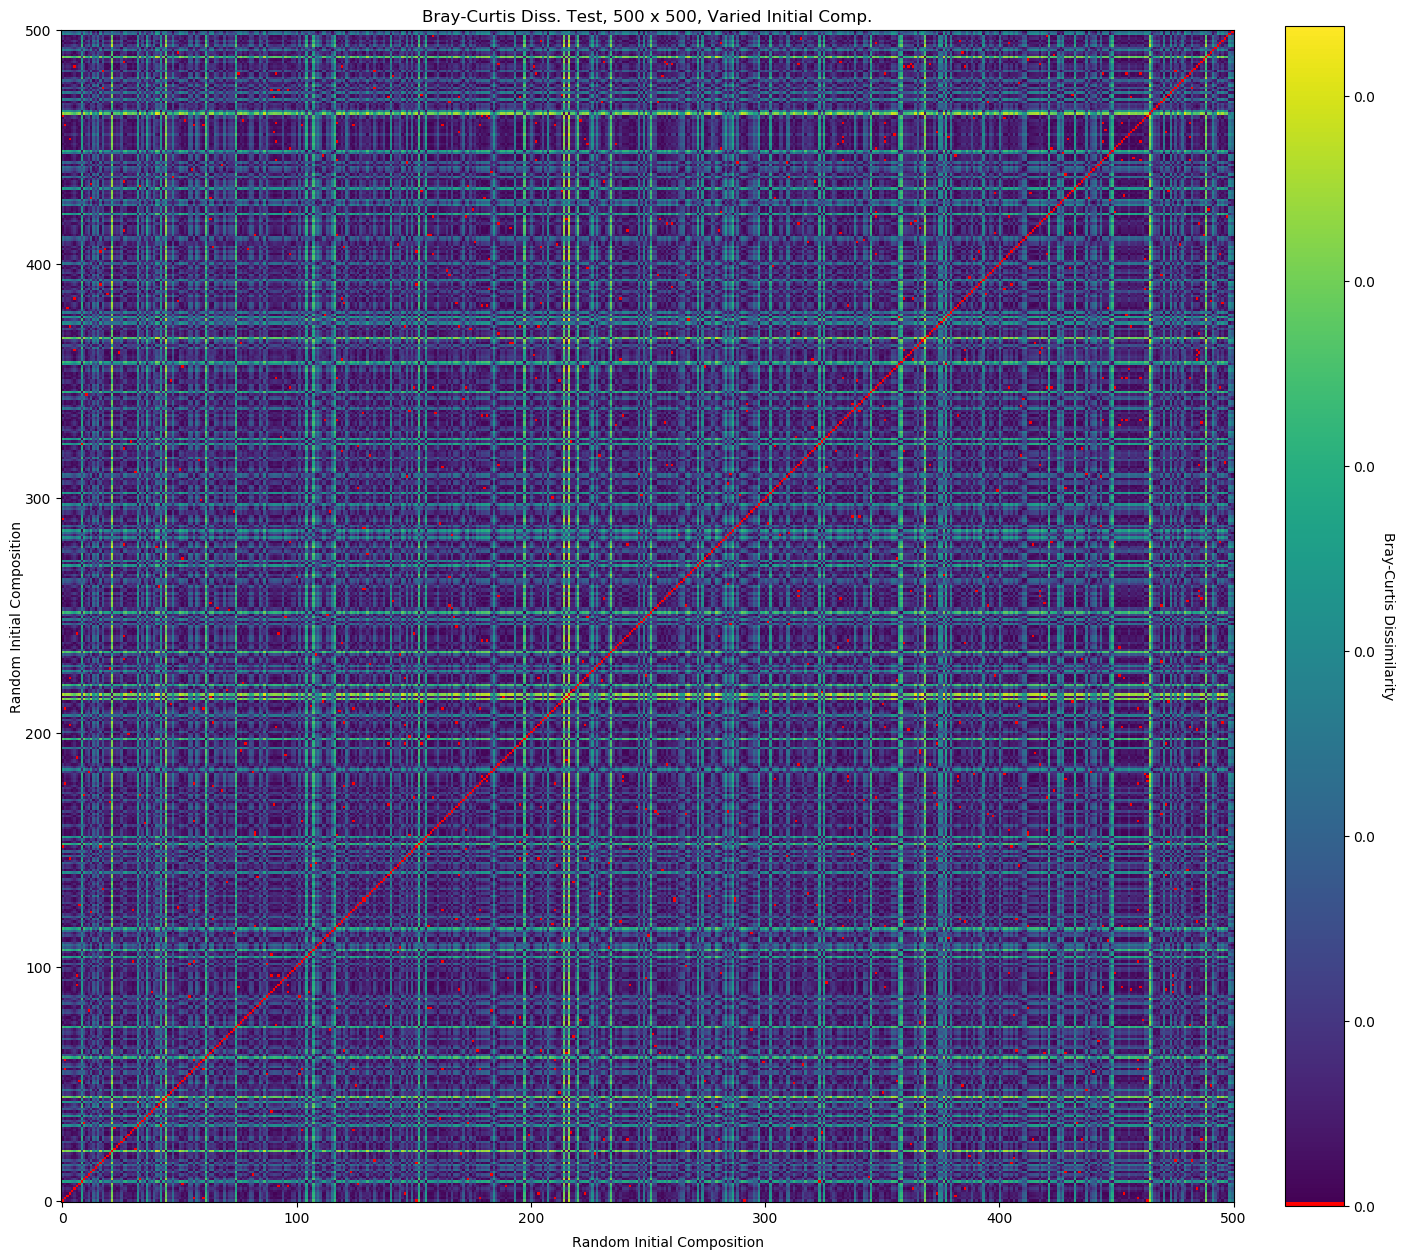

In [12]:
using PyCall
viridis = plt.cm.get_cmap("viridis", 256)
newcolors = viridis(0:255)
red = [256/256, 0/256, 0/256, 1]
newcolors[:1, :] = red
matcolors = pyimport("matplotlib.colors")
newcmp = matcolors.ListedColormap(newcolors)

fig, ax = plt.subplots()
im = ax.imshow(bcs, origin="lower", aspect="equal")
psm = ax.pcolormesh(bcs, cmap=newcmp, rasterized=true)
cbar1 = ax.figure.colorbar(psm, ax=ax, format="%0.1f", fraction=0.046, pad=0.04)
cbar1.ax.set_ylabel("Bray-Curtis Dissimilarity", rotation=-90, va="bottom")
ax.set_title("Bray-Curtis Diss. Test, $nSamples x $nSamples, Varied Initial Comp.")
fig.text(.47, 0.05, "Random Initial Composition", ha="center")
fig.text(0, .5, "Random Initial Composition", va="center", rotation="vertical")
fig.set_figheight(14)
fig.set_figwidth(14)
fig.tight_layout()
# fig.savefig("Fine_Mean_Heatmap_nC_$(nc)_nM_$(nm)_fracPos_$(convert(Int64, round(fp*100)))_normed.png", dpi=300)
# fig.savefig("Fine_Mean_Heatmap_nC_$(nc)_nM_$(nm)_fracPos_$(convert(Int64, round(fp*100)))_linear.png", dpi=300)